# Transfer Learning


Transfer learning is leveraging a working model's existing architecture and learned patterns

There are two main benefits:
* Can leverage an exisitng neural network architecture proven to work on problems similars
* Can leverage a working neural network architecture which has already learned patterns on similar data to our own and can adapt those patterns to our own data

## Data Process

### Import Libraries

In [ ]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
import zipfile
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

### Get Data

In [ ]:
# Download the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzip

zip_ref = zipfile.ZipFile('10_food_classes_10_percent.zip')
zip_ref.extractall()
zip_ref.close()


--2024-02-14 14:39:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.107.207, 74.125.196.207, 74.125.134.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.107.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.5’

10_food_classes_10_ 100%[===================>] 160.74M   101MB/s    in 1.6s    

2024-02-14 14:39:16 (101 MB/s) - ‘10_food_classes_10_percent.zip.5’ saved [168546183/168546183]



In [ ]:
# How many images in each folder?
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent

### SetUp Data

In [ ]:
# Setup Data
train_dir = '10_food_classes_10_percent/train/'
test_dir = '10_food_classes_10_percent/test'
data_dir = pathlib.Path(train_dir)

# Preprocess data get all of the pixel values between 0 and 1
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
train_datagen_augmented = ImageDataGenerator(rescale = 1./255, rotation_range=0.2, shear_range=0.2, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir, batch_size = 32, target_size= (224,224)) #Target size, redimension the image to fit in 224 pixels x 224 pixels
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, batch_size = 32, target_size= (224,224), shuffle = True)
test_data = test_datagen.flow_from_directory(test_dir, batch_size = 32, target_size= (224,224))


class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(len(class_names))

Found 750 images belonging to 10 classes.
Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.
10


### Setting Up Callbacks

Callback are extra functionality you can add to your models to e perfotmed during or after training. Some of the modt popular callbacks:
* Tracking experiments with the **TensorBoard** callback
* Model checkpoint with the **ModelCheckpoint** callback
* Stopping a model from training (before it trains too long and overfits) with the **EarlyStopping** callback


In [1]:
# Create TensorBoard callback
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") # Create a directorypath to store
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(log_dir)
  return tensorboard_callback

## Create our model with TesorFlow Hub (Feature Extraction)

* https://tfhub.dev/
* 100+ Models pretrained


In [5]:
# Create a model from URL
def create_model(model_url, num_classes=10):

  # Download pretrained model
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable= False, # Freeze tge already learned patterns
                                           name= "feature_extraction_layer",
                                           input_shape= (224,224,3))
  #Create the model
  model = tf.keras.Sequential([feature_extractor_layer,
                               layers.Dense(num_classes, activation = 'softmax', name = "output_layer")])

  return model


In [6]:
# Creating a Efficent model
efficent_url = "https://www.kaggle.com/models/tensorflow/efficientnet/frameworks/TensorFlow2/variations/b0-feature-vector/versions/1"



eff_model = create_model(efficent_url, num_classes=train_data.num_classes)

NameError: name 'train_data' is not defined

In [3]:
#Compile the model
eff_model.compile(loss= 'categorical_crossentropy',
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

NameError: name 'eff_model' is not defined

In [2]:
history_eff = eff_model.fit(train_data,
                            epochs = 5,
                            steps_per_epoch = len(train_data),
                            callbacks= [create_tensorboard_callback(dir_name='tensorflow_hub', experiment_name='efficent_model')])

NameError: name 'eff_model' is not defined

## Evaluate our model

### Loss Curves

In [ ]:
# Loss Curve
import matplotlib.pyplot as plt
# plot the validation and traning curves separately
def plot_loss(history):
  loss = history.history['loss']
  #val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  #val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label = 'Training_loss')
  #plt.plot(epochs, val_loss, label = 'Val_loss')
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label = 'Training_acc')
  #plt.plot(epochs, val_accuracy, label = 'Val_acc')
  plt.xlabel("epochs")
  plt.legend()

  plt.show()

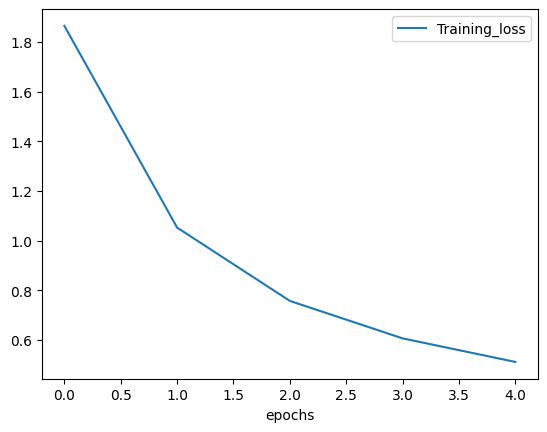

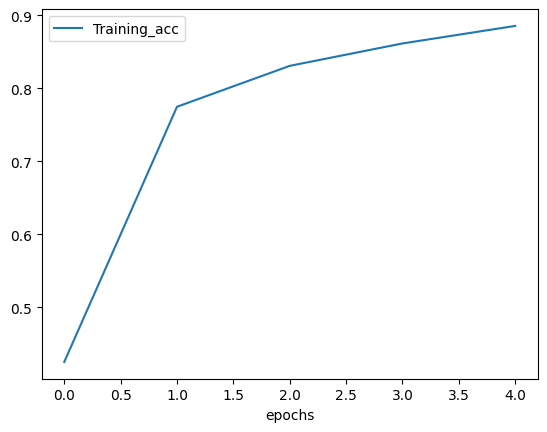

In [ ]:
plot_loss(history_eff)

In [ ]:
eff_model.evaluate(test_data)

79/79 [==============================] - 156s 2s/step - loss: 0.5522 - accuracy: 0.8676


[0.5521693229675293, 0.8676000237464905]

### Plot the Image

In [ ]:
def plot_image_with_prediction(model, filename, class_names = class_names):
  #import the target image and preprocces it
  img = load_image(filename)

  # Make the prediction
  pred = model.predict(tf.expand_dims(img, axis = 0))
  # Get the predicted class
  pred_class = tf.argmax(pred, axis=1)
  pred_class = pred_class.numpy()[0]
  pred_class = class_names[pred_class]
  # plot the image
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

### Load image

In [ ]:
def load_image(filename, img_shape = 224):
  # Read the image
  img = tf.io.read_file(filename)

  #Decode the read file into a tensor
  img = tf.image.decode_image(img)

  # Resize the image
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image to 0 - 1
  img = img/225.
  return img

In [ ]:
!wget https://buttermilkbysam.com/wp-content/uploads/2023/07/no-churn-chocolate-ice-cream-7.jpg


--2024-02-14 15:39:13--  https://buttermilkbysam.com/wp-content/uploads/2023/07/no-churn-chocolate-ice-cream-7.jpg
Resolving buttermilkbysam.com (buttermilkbysam.com)... 104.19.155.92
Connecting to buttermilkbysam.com (buttermilkbysam.com)|104.19.155.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 286707 (280K) [image/jpeg]
Saving to: ‘no-churn-chocolate-ice-cream-7.jpg’

no-churn-chocolate- 100%[===================>] 279.99K  --.-KB/s    in 0.02s   

2024-02-14 15:39:13 (11.8 MB/s) - ‘no-churn-chocolate-ice-cream-7.jpg’ saved [286707/286707]



In [ ]:
sushi = load_image("03-sushi.jpeg")

1/1 [==============================] - 1s 1s/step


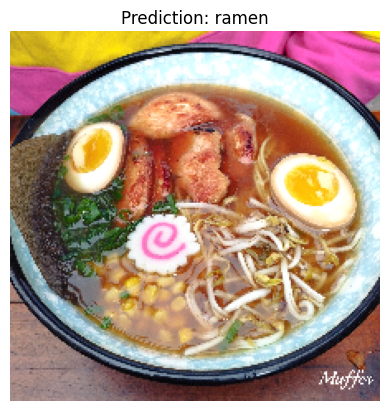

In [ ]:
plot_image_with_prediction(eff_model, "ramen.jpg")